## Task 2: Visualize and cluster the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# replace NaN to 0
df = pd.read_csv('data1.csv',index_col = 0)


In [2]:
!pip install cufflinks plotly
!pip3 install -i https://pypi.tuna.tsinghua.edu.cn/simple chart_studio

# 导入plotly包
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot,init_notebook_mode


# 使用离线模式的 plotly + cufflinks
import cufflinks
cufflinks.go_offline(connected=True)
plotly.offline.init_notebook_mode(connected=True)

In [3]:
# find most popular symptoms

popularData = df.loc[:,"symptom:Adrenal crisis":"symptom:Yawn"].count().sort_values(ascending=False).head(20)

popularData

symptom:Yawn                                608
symptom:Hyperventilation                    608
symptom:Dyspareunia                         608
symptom:Dystonia                            608
symptom:Dysuria                             608
symptom:Epiphora                            608
symptom:Esophagitis                         608
symptom:Eye pain                            608
symptom:Facial swelling                     608
symptom:Fecal incontinence                  608
symptom:Fibrocystic breast changes          608
symptom:Focal seizure                       608
symptom:Gastroparesis                       608
symptom:Generalized tonic??lonic seizure    608
symptom:Gingival recession                  608
symptom:Globus pharyngis                    608
symptom:Goitre                              608
symptom:Grandiosity                         608
symptom:Granuloma                           608
symptom:Heart murmur                        608
dtype: int64

In [4]:
# get 16 regions, convert df to list
regionList = df['sub_region_1'].drop_duplicates().values.tolist()

# convert 20 symptoms to list
symptomList = popularData.index.tolist()


In [5]:
# draw the heatmap for each Symptom in different region

import plotly.express as px

# fill the NaN
dfFilled = df.fillna(value=0)

for symptom in symptomList:
    # create the heat matrix[dates][16 region]
    heatMat = []
    for region in regionList:
        subRegion = dfFilled[df['sub_region_1'].isin([region])]
        subList = subRegion[symptom].tolist()
        heatMat.append(subList)
        dateList = subRegion['date']

    fig = px.imshow(heatMat,
                labels=dict(x="Date", y="Region", color="Popularity"),
                x=dateList,
                y=regionList,title=symptom)
    fig.update_xaxes(side="top")
    fig.show()


In [6]:
# draw the heatmap for each Region with 20 symptoms


import plotly.express as px

# fill the NaN
dfFilled = df.fillna(value=0)

for region in regionList:
    
    dateList = subRegion['date']   
    subRegion = dfFilled[df['sub_region_1'].isin([region])]
    allSymptoms = subRegion[symptomList].values.tolist()
    allSymptoms = np.asmatrix(allSymptoms).transpose()

    fig = px.imshow(allSymptoms,
                labels=dict(x="Date", y="Symptom", color="Popularity"),
                x=dateList,
                y=symptomList,title=region)
    fig.update_xaxes(side="top")
    fig.show()

In [7]:
# Visualize the evolution of popularity of various symptoms across different regions over time.

for i in regionList:
    subRegion = df[df['sub_region_1'].isin([i])]
   
    subRegion[['symptom:Aphonia','symptom:Ventricular fibrillation','symptom:Shallow breathing','symptom:Dysautonomia','symptom:Crackles','date']].iplot(kind='bar',xTitle='date',yTitle='population',barmode='overlay',x='date',title=i)



Text(0.5, 1.0, 'Cumulative Variance Explained vs Principal Components')

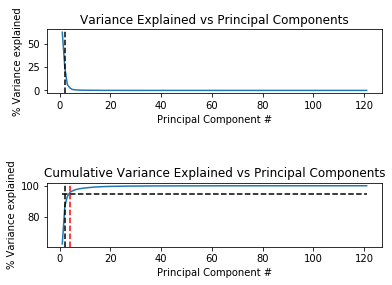

In [8]:
# 2
# use data1 from task 1
data1 = pd.read_csv('data1.csv',index_col = 0)

from sklearn.preprocessing import StandardScaler
features = data1.columns.tolist()
features = features[6:] # features are all symtoms

x = data1.loc[:, features].values # Separating out the features
np.nan_to_num(x,copy=False) # Replace nan with 0

x_stand = StandardScaler(with_std=False).fit_transform(x) # Standardizing the features

# selecting number of components
from sklearn.decomposition import PCA
pca2 = PCA()
pca2.fit(x_stand)
num_pc_components = len(pca2.explained_variance_ratio_)
plt.subplot(3,1,1)
plt.plot(np.linspace(1,num_pc_components,num_pc_components),100*pca2.explained_variance_ratio_)
plt.axvline(x=2, color="black", linestyle="--")
plt.xlabel("Principal Component #")
plt.ylabel("% Variance explained")
plt.title("Variance Explained vs Principal Components")

plt.subplot(3,1,3)
plt.plot(np.linspace(1,num_pc_components,num_pc_components),100*np.cumsum(pca2.explained_variance_ratio_))
plt.plot(np.linspace(1,num_pc_components,num_pc_components),95*np.ones((num_pc_components,)),'k--')
plt.axvline(x=2, color="black", linestyle="--")
plt.axvline(x=4, color="red", linestyle="--")
plt.xlabel("Principal Component #")
plt.ylabel("% Variance explained")
plt.title("Cumulative Variance Explained vs Principal Components")

The optimal number of principle components is around 4. But we need to visualize the dataset, we select reduced dimension = 2. We will use # PC =20 later in the custering method.

D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



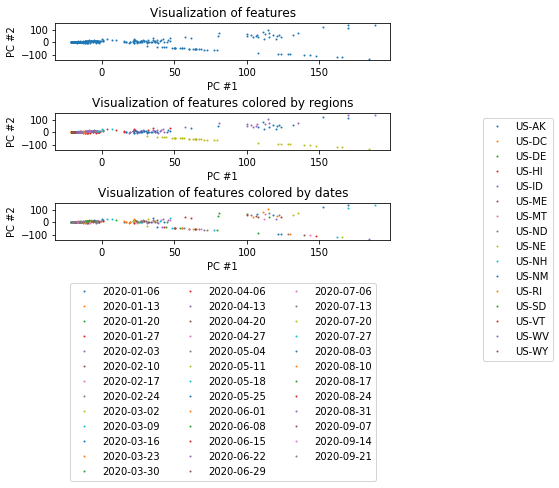

In [9]:
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(x_stand)

# Pltos only with features
plt.subplot(5,1,1)
plt.scatter(x_reduced[:,0], x_reduced[:,1], s=1)
plt.xlabel("PC #1")
plt.ylabel("PC #2")
plt.title("Visualization of features")

# Plots with features colored by regions
region = data1.loc[:,'open_covid_region_code'].values

df1 = pd.DataFrame({"PC #1": x_reduced[:,0], "PC #2": x_reduced[:,1], "Region": region})
groups = df1.groupby("Region")
plt.subplot(5,1,3)
for name, group in groups:
    plt.plot(group["PC #1"], group["PC #2"], marker="o", markersize=1, linestyle="", label=name)
plt.title("Visualization of features colored by regions")
plt.xlabel("PC #1")
plt.ylabel("PC #2")
plt.legend(bbox_to_anchor=(1.5, 1))

# Plots with features colored by date
date = data1.loc[:,'date'].values

df2 = pd.DataFrame({"PC #1": x_reduced[:,0], "PC #2": x_reduced[:,1], "Date": date})
groups2 = df2.groupby("Date")
plt.subplot(5,1,5)
for name, group in groups2:
    plt.plot(group["PC #1"], group["PC #2"], marker="o", markersize=1, linestyle="", label=name)
plt.title("Visualization of features colored by dates")
plt.xlabel("PC #1")
plt.ylabel("PC #2")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -1), fancybox=True, ncol=3)

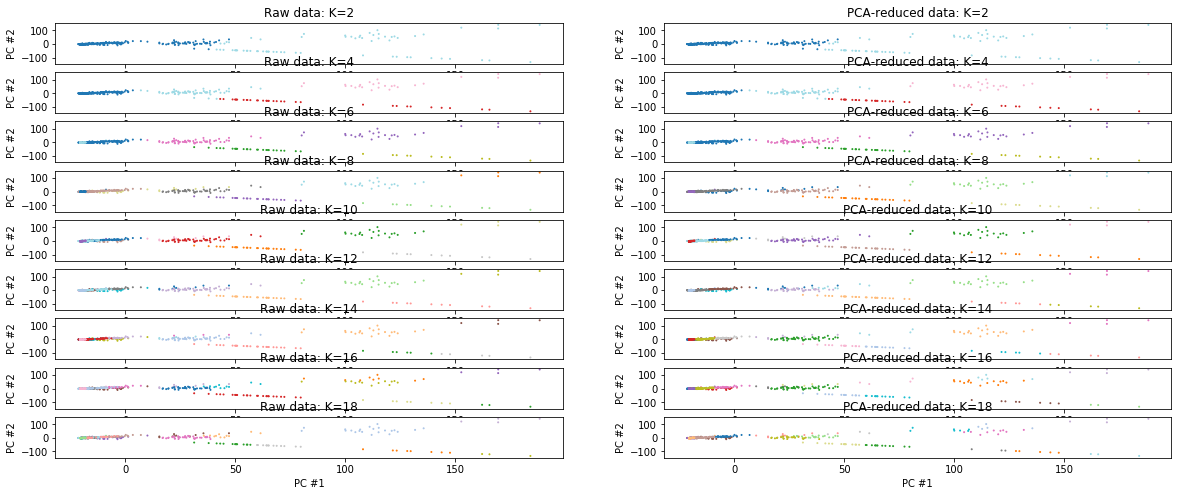

In [10]:
# 3
# We use the optimal reduced dimensions here
pca3 = PCA(n_components=4)
x_reduced = pca3.fit_transform(x_stand)

# Import the KMeans module from sklearn
from sklearn.cluster import KMeans


kvals = list(range(2,19,2)) # try out with different number of clusters, k increased by 2 

# Use k-means for raw data and PCA-reduced data
fig,a =  plt.subplots(9, 2, figsize=(20,8))
for i, k in enumerate(kvals):
    kmeans_raw = KMeans(n_clusters=k, random_state=0)
    kmeans_raw.fit(x)
    y_pred_raw = kmeans_raw.predict(x) 
    
    a[i][0].scatter(x_reduced[:,0], x_reduced[:,1], c=y_pred_raw, cmap=plt.cm.get_cmap('tab20'), s=1)
    a[i][0].set_title('Raw data: '+f'K={k}')
    a[i][0].set_xlabel("PC #1")
    a[i][0].set_ylabel("PC #2") # raw data
    
    kmeans_reduced = KMeans(n_clusters=k, random_state=0)
    kmeans_reduced.fit(x_reduced)
    y_pred_reduced = kmeans_reduced.predict(x_reduced)
    
    a[i][1].scatter(x_reduced[:,0], x_reduced[:,1], c=y_pred_reduced, cmap=plt.cm.get_cmap('tab20'), s=1)
    a[i][1].set_title('PCA-reduced data: '+f'K={k}')
    a[i][1].set_xlabel("PC #1")
    a[i][1].set_ylabel("PC #2") # PCA-reduced data  
plt.show()
    